<h1>Noisy Sphere

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

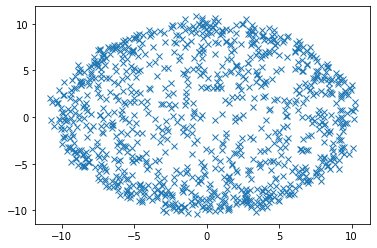

In [2]:
# set parameters
#sphere data
def return_sphere(r,m):
    noise_parameter = 0.05 #amount of noise away from a true sphere.
    eps = np.random.normal(size = m)*noise_parameter
    # create dataset
    
    theta = 2*np.pi*np.random.uniform(low=0,high=1,size=m)
    phi = np.arccos(1 - 2 * np.random.uniform(low=0,high=1,size=m))
    X = r*(1+eps)*np.sin(phi) * np.cos(theta)
    Y = r*(1+eps)*np.sin(phi) * np.sin(theta)
    Z = r*(1+eps)*np.cos(phi)
    
    data_sphere = np.array([X,Y,Z])
    return data_sphere

[X,Y,Z] = return_sphere(10,1000) #This would be an m by 3 array of coordinates which could be put into the neural network.

plt.plot(X,Y, 'x')


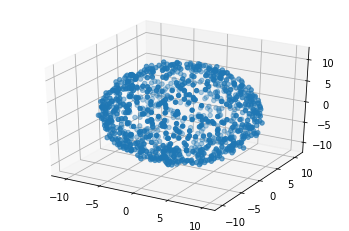

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(X,Y,Z)



<h1>Noisy Ellipsoid


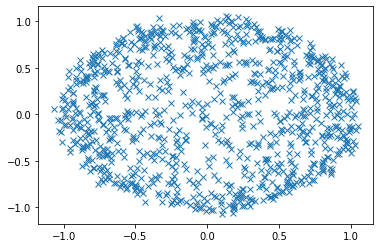

In [4]:
def return_ellipsoid(m,x_stretch,y_stretch,z_stretch):
    noise_parameter = 0.05 #amount of noise away from a true sphere.
    a_x = x_stretch#x-direction stretch
    b_y = y_stretch#y-direction stretch
    c_z  = z_stretch#z-direction stretch
    eps = np.random.normal(size = m)*noise_parameter
    # create dataset
    theta = 2*np.pi*np.random.uniform(low=0,high=1,size=m)
    phi = np.arccos(1 - 2 * np.random.uniform(low=0,high=1,size=m))
    X = a_x*(1+eps)*np.sin(phi) * np.cos(theta)
    Y = b_y*(1+eps)*np.sin(phi) * np.sin(theta)
    Z = c_z*(1+eps)*np.cos(phi)
    data_ellipsoid = np.array([X,Y,Z])
    return data_ellipsoid

[X,Y,Z] = return_ellipsoid(1000,1,1,10) #This would be an m by 3 array of coordinates which could be put into the neural network.

plt.plot(X,Y, 'x')

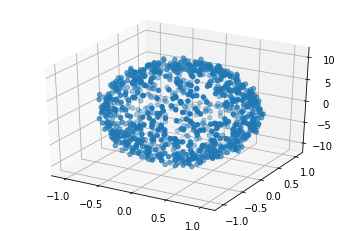

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(X,Y,Z)

<h1>Noisy Rodney

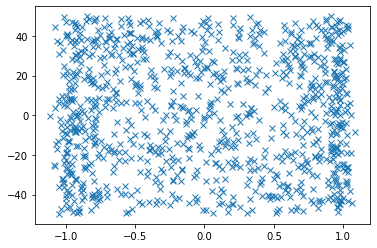

In [6]:
def return_rod(m,r,z_stretch):
    noise_parameter = 0.05 #amount of noise away from a true sphere.
    z_eps = np.random.normal(size = m)*noise_parameter
    x_eps = np.random.normal(size = m)*noise_parameter
    # create dataset 
    Theta = 2*np.pi*np.random.rand(m) - np.pi
    #X = r*(1+x_eps)*np.cos(Theta)
    X = r*(1+x_eps)*np.cos(Theta)
    Y = np.random.uniform(low= -z_stretch/2,high = z_stretch/2,size = m)
    Z = r*(1+z_eps)*np.sin(Theta)
    data_rod = np.array([X,Y,Z])
    return data_rod

[X,Y,Z] = return_rod(1000,1,100) #This would be an m by 3 array of coordinates which could be put into the neural network.

plt.plot(X,Y, 'x')

Text(0.5, 0.92, 'A rare sighting of Rodney')

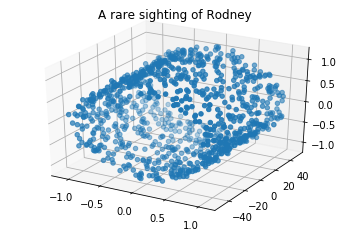

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(X,Y,Z)
plt.title('A rare sighting of Rodney')

<h1>Don't be Square

<h1> Random Rotation in 3D Space

In [17]:
def random_rotation_matrix():
    theta = np.arccos(2*np.random.uniform(low = 0,high = 1)-1)
    phi = np.random.uniform(low = 0,high = 2*np.pi)
    u = np.array([np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)])
    theta = np.random.uniform(low = 0,high = 2*np.pi)
    A = np.zeros((3,3))
    A[0][0] = np.cos(theta) + (u[0]**2)*(1-np.cos(theta))
    A[0][1] = u[0]*u[1]*(1-np.cos(theta)) - u[2]*np.sin(theta)
    A[0][2] = u[0]*u[2]*(1-np.cos(theta)) + u[1]*np.sin(theta)
    A[1][0] = u[1]*u[0]*(1-np.cos(theta)) + u[2]*np.sin(theta)
    A[1][1] = np.cos(theta) + (u[1]**2)*(1-np.cos(theta))
    A[1][2] = u[1]*u[2]*(1-np.cos(theta)) - u[0]*np.sin(theta)
    A[2][0] = u[2]*u[0]*(1-np.cos(theta)) - u[1]*np.sin(theta)
    A[2][1] = u[2]*u[1]*(1-np.cos(theta)) + u[0]*np.sin(theta)
    A[2][2] = np.cos(theta) + (u[2]**2)*(1-np.cos(theta))
    return A

In [18]:
A = random_rotation_matrix()

In [23]:
print(np.linalg.norm(A*[0,0,1]))

0.9999999999999999
